In [1]:
#dataloader code
from unet import *
from segmentation_dataset import *
import os
from torch.utils.data import DataLoader
from segmentation_dataset import SegmentationDataset
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision import datasets, transforms

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

train_path = "small_dataset/images/nir/"
val_path = "small_dataset/images/nir/"
test_path = "small_dataset/images/nir/"

train_labels_path = "small_dataset/labels/"

train_img_names_index = os.listdir(train_path)[:10]
val_img_names_index = os.listdir(val_path)[:10]
test_img_names_index = os.listdir(test_path)[:10]

labels_one_hot = {}
k = 9
for i, label in enumerate(listdir_nohidden(train_labels_path)):
    labels_one_hot[label] = np.zeros((k,))
    labels_one_hot[label][i] = 1

train_dataset = SegmentationDataset(train_img_names_index, labels_one_hot)
val_dataset = SegmentationDataset(val_img_names_index, labels_one_hot)
test_dataset = SegmentationDataset(test_img_names_index, labels_one_hot)

In [2]:
#SETTINGS
Use_GPU = True
Lr = 1e-5
channels = 1 # 512*512 #pixels
classes = 10 #outputs 
maxEpochs = 100 # 100
batch_size = 5
shuffle = True

#Code 
if Use_GPU: 
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print('cuda used')
    else:
        device = torch.device('cpu')
else:
    device = torch.device('cpu')
#initalize model 

#fix activationfunc, dropout and other settings for model as parameters later 

model = UNet(channels, classes).to(device)

#two different filepaths
pathTrain = "Agriculture-Vision-2021\train"
pathVal = "Agriculture-Vision-2021\val"

trainValRate = 0.7 #not in use
lrRatesplan = None #not in use
activation = "relu" #not in use 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), Lr)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset)
test_dataloader = DataLoader(test_dataset)

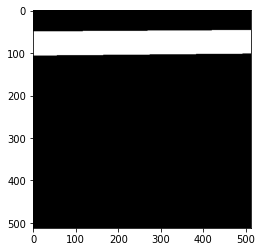

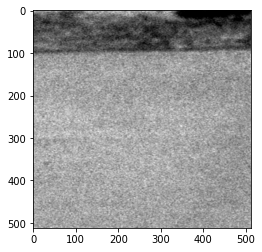

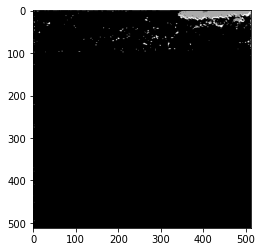

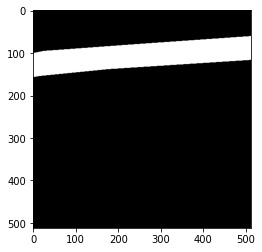

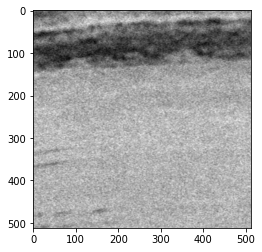

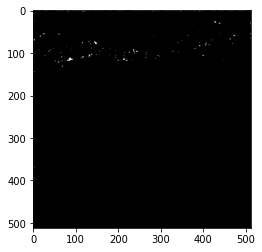

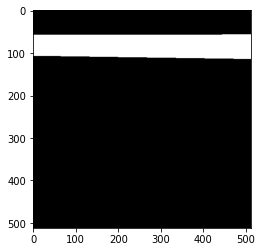

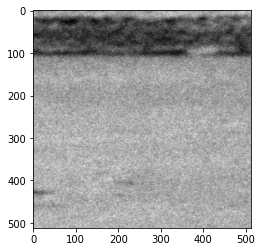

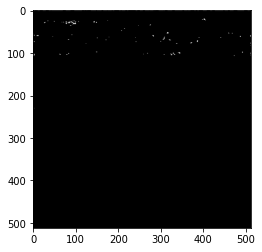

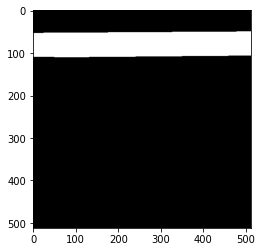

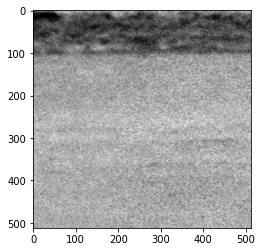

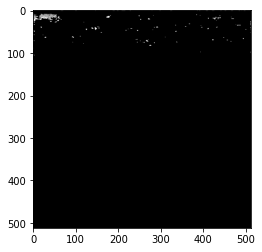

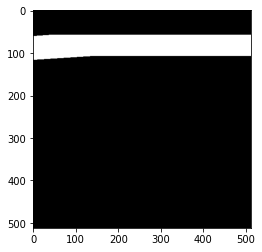

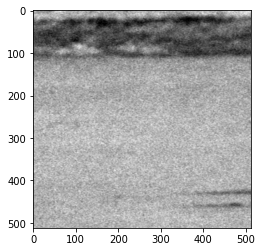

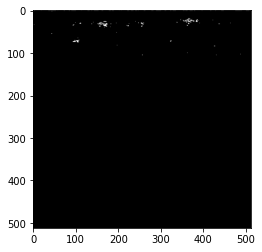

training Epoch :0max Epochs
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 13
intersection: 0
union: 1
intersection: 0
union: 20560
intersection: 0
union: 654
Validation accuracy: 1.5290519854295841e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 1
intersection: 0
union: 19014
intersection: 0
union: 615
Validation accuracy: 1.6260162575186726e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 1
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 34
intersection: 0
union: 1
intersection: 0
union: 31632
intersection: 0
union: 831
Validation accuracy: 1.2033694329682678e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
unio

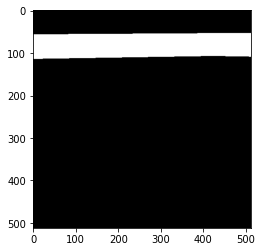

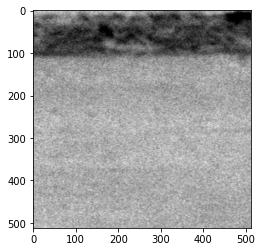

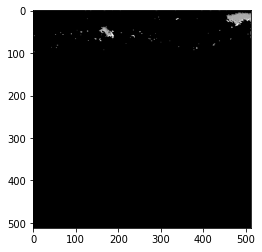

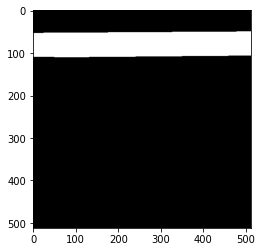

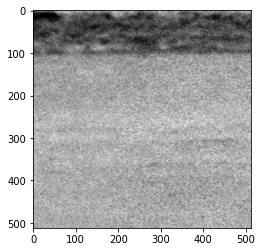

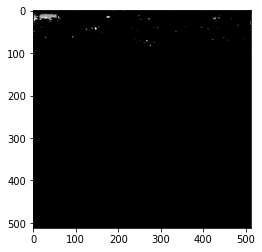

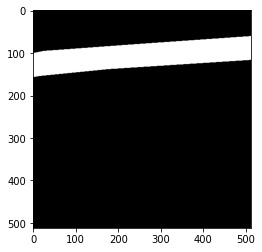

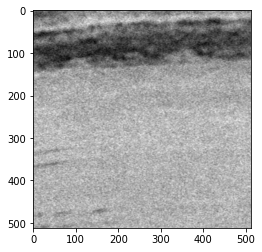

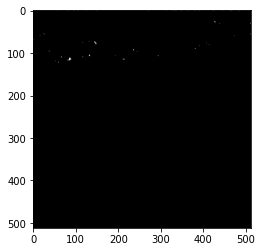

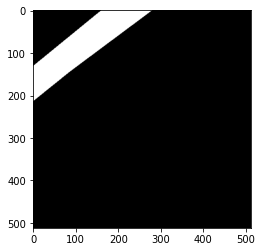

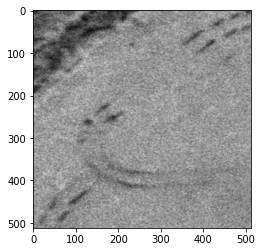

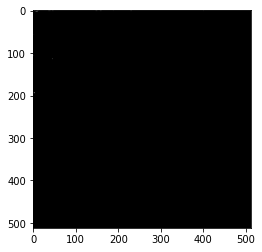

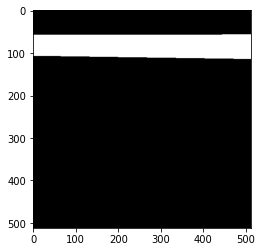

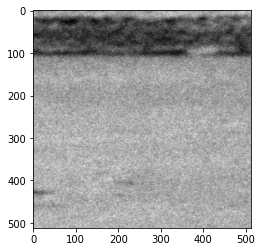

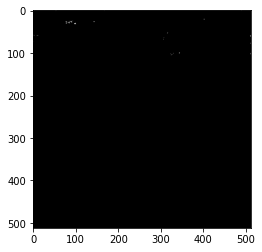

intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 9
intersection: 0
union: 1
intersection: 0
union: 20560
intersection: 0
union: 547
Validation accuracy: 1.828153561557306e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 1
intersection: 0
union: 19014
intersection: 0
union: 530
Validation accuracy: 1.8867924492702028e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 24
intersection: 0
union: 1
intersection: 0
union: 31632
intersection: 0
union: 611
Validation accuracy: 1.6366612084506364e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 4
intersection: 0
union: 1


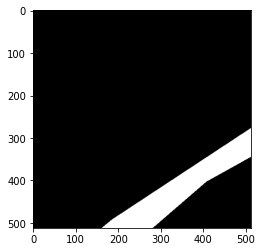

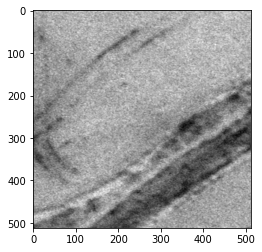

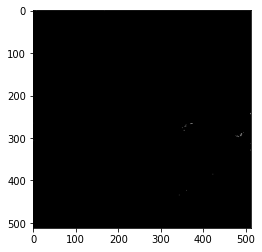

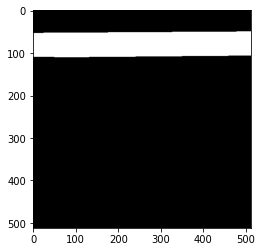

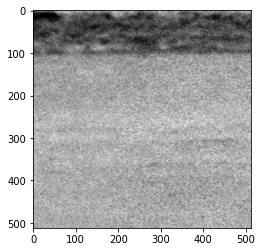

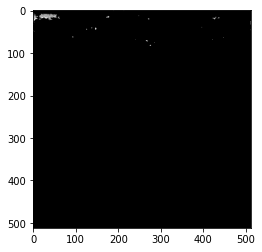

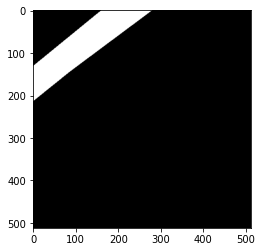

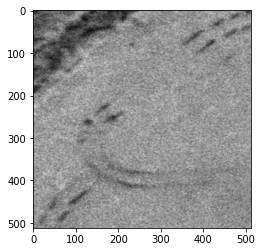

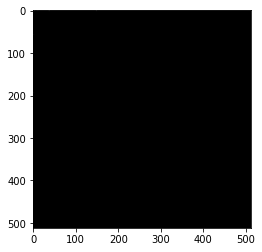

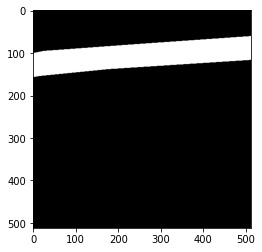

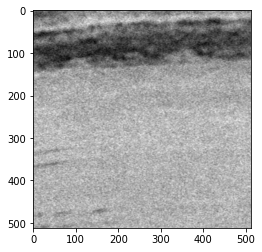

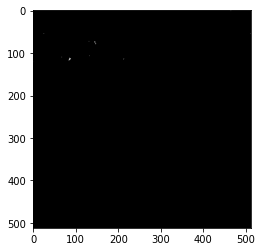

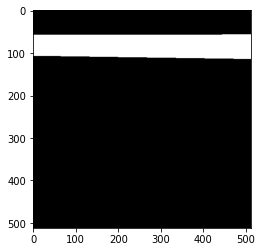

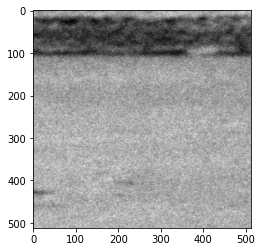

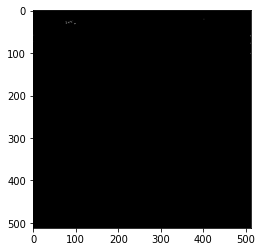

intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 6
intersection: 0
union: 1
intersection: 0
union: 20560
intersection: 0
union: 520
Validation accuracy: 1.9230769193786983e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 1
intersection: 0
union: 19014
intersection: 0
union: 511
Validation accuracy: 1.9569471585969723e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 18
intersection: 0
union: 1
intersection: 0
union: 31632
intersection: 0
union: 557
Validation accuracy: 1.7953321332220248e-09
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 0
intersection: 0
union: 1
intersection: 0
union: 1

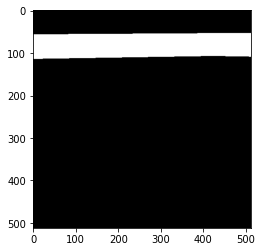

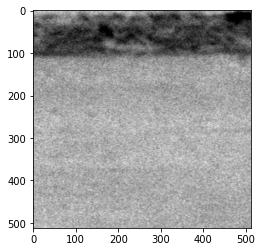

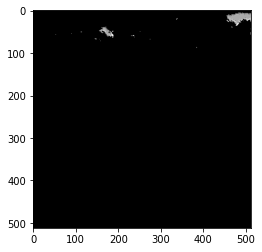

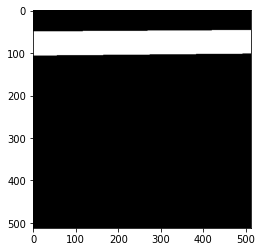

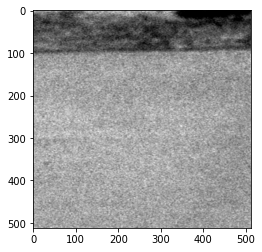

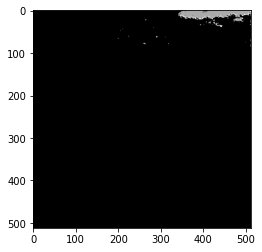

In [3]:
#trainer class/object?

from tqdm import tqdm, trange

trainingAcc = []
trainingLoss = []
validationAcc = []
validationLoss = []

def itterProgress(x, text = "training"):
    return tqdm(enumerate(x), text, total = len(x))

def run(): 
#     itter = itterProgress(trainX)
    
    
    for epoch in range(maxEpochs):
        train()
        if epoch % 10 == 0: 
            print("training Epoch :" + str(epoch)  + "max Epochs")

        # if validate_go: 
        val_loss = validate()
        if val_loss > np.mean(validationLoss):
            print("Overfitting detected")
            break
            
        # model()
        # accuracy()
            
        # sys.stdout.write(f"\rEpoch {epoch+1}: loss={train_loss} acc={train_acc} val_loss={val_loss} val_acc={val_acc}")
        # sys.stdout.flush()
        
#     print(trainingLoss)
#     print(validationLoss)
    

def train(): 
    model.train()
    for i, (batch_x, batch_y) in enumerate(train_dataloader):
        indata, target = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        indata = indata.unsqueeze(1)
        out = model(indata)

        out_softmax = torch.softmax(out, 1)
        img = postprocess(out_softmax)

        plt.imshow(target[0], cmap='gray')
        plt.show()
        plt.imshow(indata[0][0], cmap='gray')
        plt.show()
        plt.imshow(img[0], cmap='gray')
        plt.show()
        
        # acc = accuracy(out,target)
        # trainingAcc.append(acc)
        
        loss = criterion(out, target)
        loss_value = loss.item()
        trainingLoss.append(loss_value)
        loss.backward()
        optimizer.step()

def validate():
    model.eval()
    validationLoss_temp = []    
    for i, (batch_x, batch_y) in enumerate(val_dataloader):
        indata, target = batch_x.to(device), batch_y.to(device)
        
        with torch.no_grad():
            indata = indata.unsqueeze(1)
            out = model.forward(indata)
            
            out_softmax = torch.softmax(out, 1)
            img = postprocess(out_softmax)
            acc = iou(img, target)
            print('Validation accuracy: ' + str(acc))
            # validationAcc.append(acc)
            
            loss = criterion(out, target)
            loss_value = loss.item()
            validationLoss.append(loss_value)
            validationLoss_temp.append(loss_value)
    
    return np.mean(validationLoss_temp)

def postprocess(img):
    img = torch.argmax(img, dim=1)
    img = img.cpu().numpy()
    img = np.squeeze(img)
    img = torch.from_numpy(img).type(torch.int64)
    # img = re_normalize(img)
    return img

def iou(prediction, target):
    eps = 1e-6

    score = 0
    for k in range(1, 10):
        intersection = torch.sum((prediction==target) * (target==k)).item()
        print('intersection: ' + str(intersection))
        union = torch.sum(prediction==k).item() + torch.sum(target==k).item()
        print('union: ' + str(union))
        iou_k = (intersection + eps) / (union + eps)
        score += iou_k

    score = score / 9
    return score


run()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(validationLoss)

In [ ]:
plt.plot(trainingLoss)

In [ ]:
x,y = next(iter(train_dataloader))
plt.imshow(x[0], cmap='gray') 

In [ ]:
plt.imshow(y[0], cmap='gray') 

In [ ]:
out = model.forward(x.unsqueeze(0).to(device))
out.shape

In [ ]:
# import tensorflow as tf

for i in range(10):
    probs = out[0][i].cpu()
    probs = probs.detach().numpy()
    plt.show()
    plt.imshow(probs, cmap='gray')

In [ ]:
import torch
a = torch.tensor([[[0, 2, 2], [0, 1, 0], [2, 1, 2]], [[0, 1, 2], [0, 1, 0], [2, 1, 2]]])
b = torch.tensor([[[0, 1, 2], [0, 1, 0], [2, 1, 2]], [[0, 1, 2], [0, 1, 0], [2, 1, 2]]])

print(a.shape)
print(b.shape)

print(torch.sum((a==b) * (a==1)).item())
print(torch.sum(a==1).item())
print(torch.sum(b==1).item())